In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft
from scipy.signal import find_peaks
%matplotlib notebook

/home/blimen/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Visualize data

In [18]:
length_of_pendulum = 0.3
sampling_rate = 100  # Sampling rate in Hz
mass_of_pendulum = 0.15  
gravity = 9.81

In [19]:
# Read data from CSV file

filename = 'Pendulum_30cm_data_MQTT_2024-05-12'
df = pd.read_csv(f"Pendulum/{filename}.csv")

# Split data from both sensors respectively
adxl_data = df[df['sensor_name'] == 'ADXL345']
mpu_data = df[df['sensor_name'] == 'MPU6050_A']

<IPython.core.display.Javascript object>


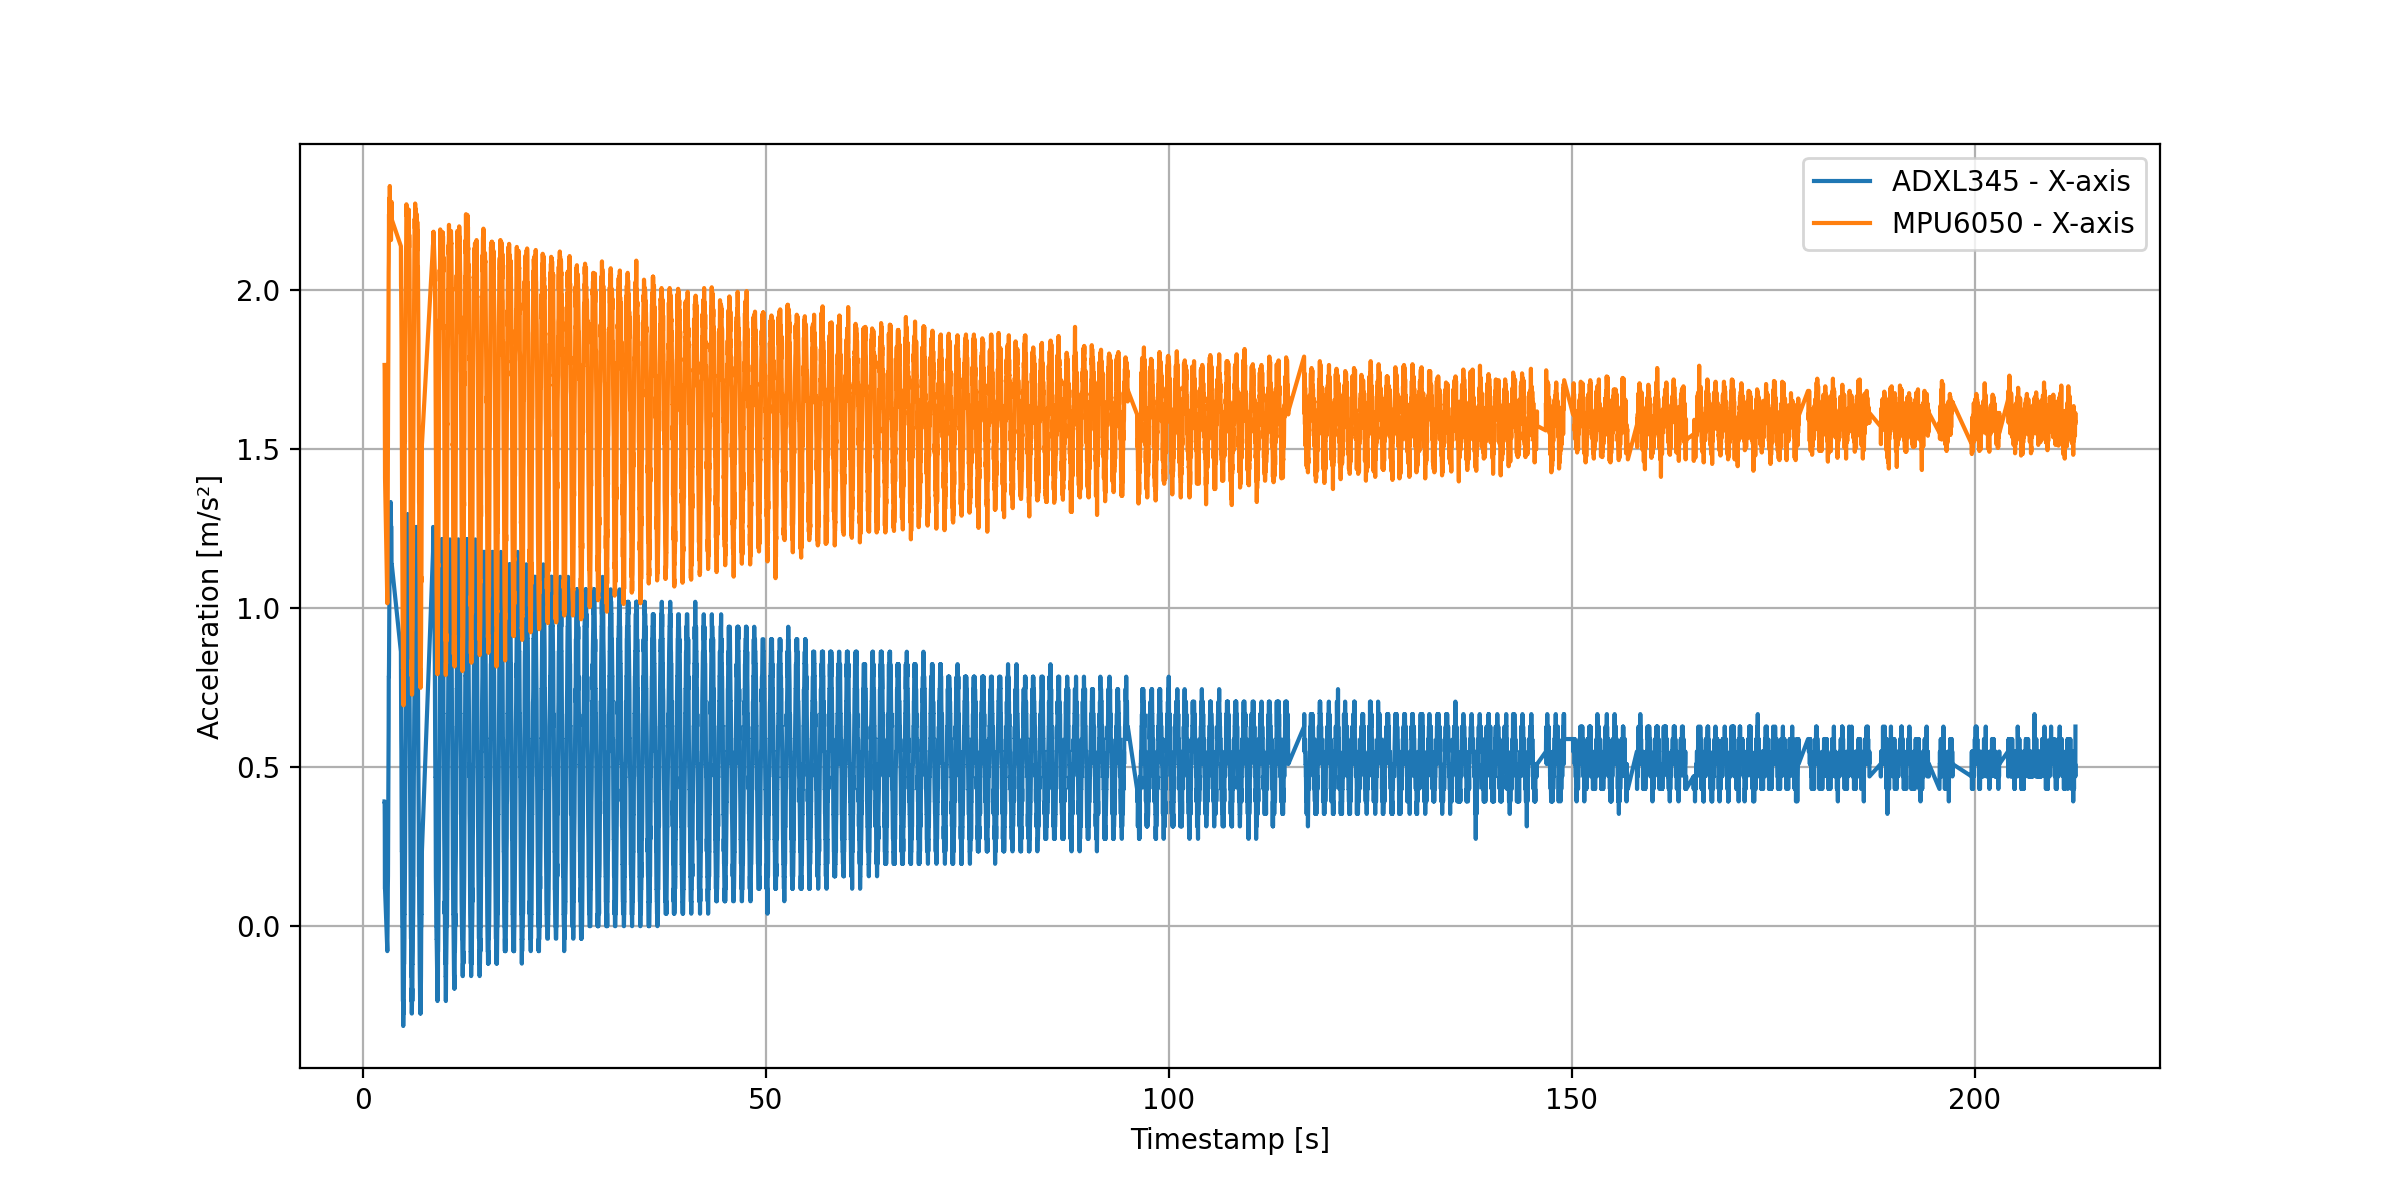

In [20]:
# Plot time series data for ADXL345
plt.figure(figsize=(12, 6))
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_x'].values, label='ADXL345 - X-axis')
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_x'].values, label='MPU6050 - X-axis')
#plt.xlim(50,60)
plt.xlabel('Timestamp [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid(True)
plt.show()

# 2. Pendulum physics

In [21]:
# Evaluate stiffness constant of the pendulum system 
theoretical_period = 2 * np.pi * np.sqrt(length_of_pendulum / gravity)
theoretical_freq = 1/theoretical_period
print(f'Theoretical T0: {theoretical_period} s')
print(f'Theoretical f0: {theoretical_freq} Hz')
print(f'Theoretical w0: {2 * np.pi * theoretical_freq} rad/s')

theoretical_stiffness = (4 * np.pi**2 * mass_of_pendulum) / theoretical_period**2
print(f'Stifness constant k: {theoretical_stiffness} N/m')

Theoretical T0: 1.0987679728847353 s
Theoretical f0: 0.9101102550109582 Hz
Theoretical w0: 5.718391382198319 rad/s
Stifness constant k: 4.905 N/m


<IPython.core.display.Javascript object>


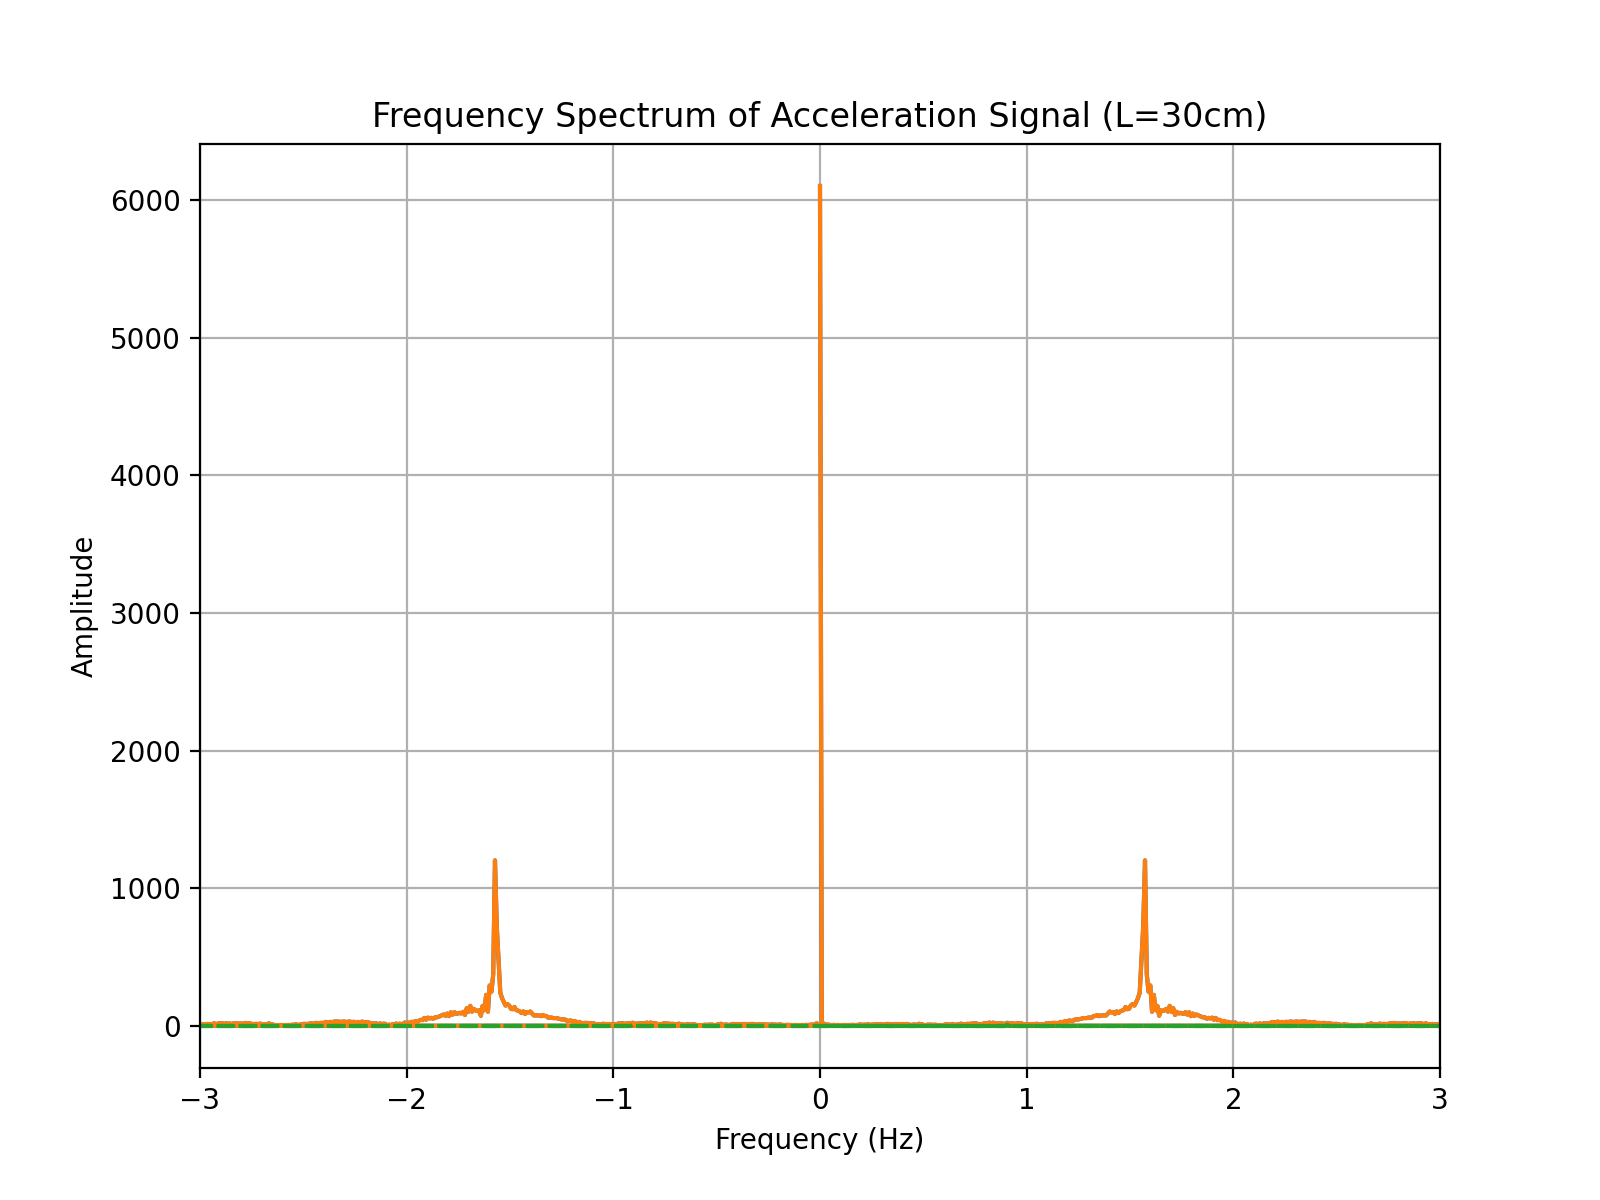

In [26]:
# Spectrum
freq_spectrum_adxl = np.fft.fft(adxl_data['acceleration_x'])
freq_axis_adxl = np.fft.fftfreq(len(mpu_data['acceleration_x']), d=1/sampling_rate)
freq_spectrum_mpu = np.fft.fft(adxl_data['acceleration_x'])
freq_axis_mpu = np.fft.fftfreq(len(mpu_data['acceleration_x']), d=1/sampling_rate)

theoretical_amplitude = 10
theoretical_spectrum = np.zeros_like(freq_axis_adxl, dtype=complex)
theoretical_spectrum[np.abs(freq_axis_adxl - theoretical_freq).argmin()] = theoretical_amplitude
theoretical_spectrum[np.abs(freq_axis_adxl + theoretical_freq).argmin()] = theoretical_amplitude


# Plot frequency pendulum
plt.figure(figsize=(8, 6))
plt.plot(freq_axis_adxl[:len(freq_axis_adxl)], np.abs(freq_spectrum_adxl)[:len(freq_spectrum_adxl)])
plt.plot(freq_axis_mpu[:len(freq_axis_mpu)], np.abs(freq_spectrum_mpu)[:len(freq_spectrum_mpu)])
plt.plot(freq_axis_adxl[:len(freq_axis_adxl)], np.abs(theoretical_spectrum)[:len(theoretical_spectrum)], label='Theoretical Spectrum', linestyle='--')
plt.xlim(-3,3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
#plt.title('Frequency Spectrum of Acceleration Signal (L=100cm)')
#plt.title('Frequency Spectrum of Acceleration Signal (L=50cm)')
#plt.title('Frequency Spectrum of Acceleration Signal (L=30cm)')
plt.grid(True)
#plt.savefig(f"spectrum_{filename}.png")
plt.show()

